<a href="https://colab.research.google.com/github/chrisporras/xgdiss/blob/main/XGDFinal2023_tiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project 2023
Machine Learning for Biomedical Data Science

Team Xtreme Gradient Dissenters

Members: Audrey Lee, Christian Porras, Joy Jiang

April 24, 2023

From: https://www.kaggle.com/code/nickuzmenkov/strip-ai-eda-data-preparation

In [ ]:
!git clone https://github.com/chrisporras/xgdiss.git

Cloning into 'xgdiss'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 28 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 198.41 KiB | 1.75 MiB/s, done.


In [ ]:
# install Kaggle public api
! pip install -q kaggle
# Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle
! cp ./xgdiss/kaggle.json ~/.kaggle/
# Make directory named kaggle and copy kaggle.json file there.
!chmod 600 ~/.kaggle/kaggle.json
#Change the permissions of the file.
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           6966        260  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36            682         24  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           2637         67  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle datasets download -d nickuzmenkov/strip-ai-256x256-png-tiles

100% 2.02G/2.03G [00:23<00:00, 88.9MB/s]
100% 2.03G/2.03G [00:23<00:00, 92.5MB/s]


In [ ]:
!unzip strip-ai-256x256-png-tiles.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/b6f1e9_0-0012.png  
  inflating: train/b6f1e9_0-0013.png  
  inflating: train/b6f1e9_0-0015.png  
  inflating: train/b6f1e9_0-0016.png  
  inflating: train/b6f1e9_0-0017.png  
  inflating: train/b6f1e9_0-0018.png  
  inflating: train/b6f1e9_0-0019.png  
  inflating: train/b6f1e9_0-0022.png  
  inflating: train/b6f1e9_0-0023.png  
  inflating: train/b6f1e9_0-0024.png  
  inflating: train/b6f1e9_0-0025.png  
  inflating: train/b6f1e9_0-0026.png  
  inflating: train/b6f1e9_0-0027.png  
  inflating: train/b6f1e9_0-0029.png  
  inflating: train/b6f1e9_0-0030.png  
  inflating: train/b6f1e9_0-0031.png  
  inflating: train/b6f1e9_0-0032.png  
  inflating: train/b6f1e9_0-0033.png  
  inflating: train/b6f1e9_0-0037.png  
  inflating: train/b6f1e9_0-0038.png  
  inflating: train/b6f1e9_0-0040.png  
  inflating: train/b6f1e9_0-0071.png  
  inflating: train/b6f1e9_0-0072.png  
  inflating: train/b6f1e9_0-0073.png  
  inflating: 

## Data Exploration

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,image_id,center_id,patient_id,image_num,label,filename
0,006388_0,11,006388,0,CE,006388_0-0000.png
1,006388_0,11,006388,0,CE,006388_0-0001.png
2,006388_0,11,006388,0,CE,006388_0-0002.png
3,006388_0,11,006388,0,CE,006388_0-0003.png
4,006388_0,11,006388,0,CE,006388_0-0004.png
...,...,...,...,...,...,...
16564,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png
16565,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png
16566,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png
16567,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png


In [ ]:
labels_num = {"CE":0, "LAA":1}
train_df['label_num'] = train_df['label'].map(labels_num)

In [ ]:
train_df

,image_id,center_id,patient_id,image_num,label,filename,label_num
0,006388_0,11,006388,0,CE,006388_0-0000.png,0
1,006388_0,11,006388,0,CE,006388_0-0001.png,0
2,006388_0,11,006388,0,CE,006388_0-0002.png,0
3,006388_0,11,006388,0,CE,006388_0-0003.png,0
4,006388_0,11,006388,0,CE,006388_0-0004.png,0
...,...,...,...,...,...,...,...
16564,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png,1
16565,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png,1
16566,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png,1
16567,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png,1


In [ ]:
train_df["file_path"] = train_df["filename"].apply(lambda x: "./train/" + x)
train_df

,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path
0,006388_0,11,006388,0,CE,006388_0-0000.png,0,./train/006388_0-0000.png
1,006388_0,11,006388,0,CE,006388_0-0001.png,0,./train/006388_0-0001.png
2,006388_0,11,006388,0,CE,006388_0-0002.png,0,./train/006388_0-0002.png
3,006388_0,11,006388,0,CE,006388_0-0003.png,0,./train/006388_0-0003.png
4,006388_0,11,006388,0,CE,006388_0-0004.png,0,./train/006388_0-0004.png
...,...,...,...,...,...,...,...,...
16564,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png,1,./train/ffec5c_1-0006.png
16565,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png,1,./train/ffec5c_1-0007.png
16566,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png,1,./train/ffec5c_1-0042.png
16567,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png,1,./train/ffec5c_1-0043.png


In [ ]:
# Get how many in each label category
train_df.groupby(["label_num"]).count()

,image_id,center_id,patient_id,image_num,label,filename,file_path
label_num,,,,,,,
0,10840,10840,10840,10840,10840,10840,10840
1,5729,5729,5729,5729,5729,5729,5729


In [ ]:
# train_df.groupby(["patient_id"]).count().sort_values(by=["image_id"])

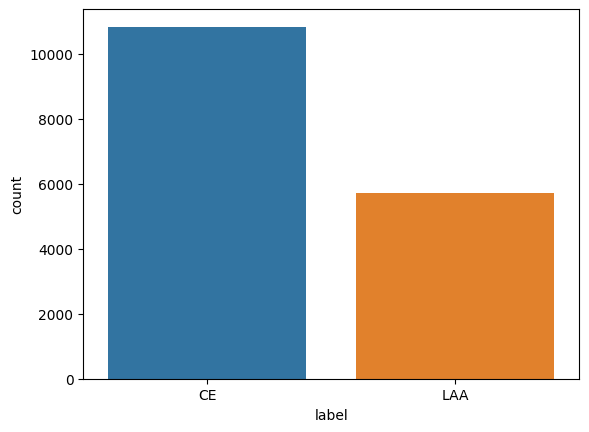

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the different classes
fig, ax = plt.subplots()
ax = sns.countplot(data=train_df,
                   x="label")


In [ ]:
# For more ease getting word labels from numerical predictions later
num_labels = {v:k for k,v in labels_num.items()}
num_labels

{0: 'CE', 1: 'LAA'}

In [ ]:
# %%time
# x_train = []
# for path in tqdm(train_df["file_path"]):
#     with open(path,"rb") as f:
#         img = pickle.load(f)
#     x_train.append(img)

In [ ]:
# plt.imshow(x_train[5])

## Stratified Group K Fold to split into train/val/test

We use group stratified k fold splitting to create 64%-16%-20% training-validation-testing splits to ensure relatively equal class distribution while safeguarding against data leakage.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold

gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(train_df['image_id'], train_df['label'], groups=train_df['patient_id'])

for fold,(trainval_idx, test_idx) in enumerate(splitter):
  trainval = train_df.loc[trainval_idx]
  test = train_df.loc[test_idx]
  train_label_count = trainval['label'].value_counts()
  testval_label_count = test['label'].value_counts()
  break

In [ ]:
trainval = trainval.reset_index()
test = test.reset_index()
test.to_csv('test_tiles.csv')

In [ ]:
test

,index,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path
0,71,008e5c_0,11,008e5c,0,CE,008e5c_0-0000.png,0,./train/008e5c_0-0000.png
1,72,008e5c_0,11,008e5c,0,CE,008e5c_0-0001.png,0,./train/008e5c_0-0001.png
2,73,008e5c_0,11,008e5c,0,CE,008e5c_0-0005.png,0,./train/008e5c_0-0005.png
3,74,008e5c_0,11,008e5c,0,CE,008e5c_0-0006.png,0,./train/008e5c_0-0006.png
4,96,01adc5_0,11,01adc5,0,LAA,01adc5_0-0000.png,1,./train/01adc5_0-0000.png
...,...,...,...,...,...,...,...,...,...
3254,16564,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0006.png,1,./train/ffec5c_1-0006.png
3255,16565,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0007.png,1,./train/ffec5c_1-0007.png
3256,16566,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0042.png,1,./train/ffec5c_1-0042.png
3257,16567,ffec5c_1,7,ffec5c,1,LAA,ffec5c_1-0043.png,1,./train/ffec5c_1-0043.png


In [ ]:
test.groupby(["label_num"]).count()

,index,image_id,center_id,patient_id,image_num,label,filename,file_path
label_num,,,,,,,,
0,2249,2249,2249,2249,2249,2249,2249,2249
1,1010,1010,1010,1010,1010,1010,1010,1010


In [ ]:
test.groupby(["patient_id"]).count().sort_values(by=["index"])

,index,image_id,center_id,image_num,label,filename,label_num,file_path
patient_id,,,,,,,,
4f49c1,1,1,1,1,1,1,1,1
8fc6d5,1,1,1,1,1,1,1,1
e72352,1,1,1,1,1,1,1,1
a2c497,1,1,1,1,1,1,1,1
2b49d6,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
e5f672,97,97,97,97,97,97,97,97
2b7304,107,107,107,107,107,107,107,107
a59c0d,112,112,112,112,112,112,112,112


In [ ]:
gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(trainval['image_id'], trainval['label'], groups=trainval['patient_id'])
for fold,(train_idx, val_idx) in enumerate(splitter):
  train = trainval.loc[train_idx]
  val = trainval.loc[val_idx]
  train_label_count = train['label'].value_counts()
  val_label_count = val['label'].value_counts()
  break

# del train['level_0']
# del val['level_0']
train = train.reset_index()
val = val.reset_index()

train=train.drop(columns=["level_0"])
val=val.drop(columns=["level_0"])

# print(train)
# print(val)

train.to_csv('train_tiles.csv')
val.to_csv('val_tiles.csv')

In [ ]:
train

,index,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path
0,0,006388_0,11,006388,0,CE,006388_0-0000.png,0,./train/006388_0-0000.png
1,1,006388_0,11,006388,0,CE,006388_0-0001.png,0,./train/006388_0-0001.png
2,2,006388_0,11,006388,0,CE,006388_0-0002.png,0,./train/006388_0-0002.png
3,3,006388_0,11,006388,0,CE,006388_0-0003.png,0,./train/006388_0-0003.png
4,4,006388_0,11,006388,0,CE,006388_0-0004.png,0,./train/006388_0-0004.png
...,...,...,...,...,...,...,...,...,...
10655,16501,fe9bec_0,4,fe9bec,0,LAA,fe9bec_0-0127.png,1,./train/fe9bec_0-0127.png
10656,16502,fe9bec_0,4,fe9bec,0,LAA,fe9bec_0-0132.png,1,./train/fe9bec_0-0132.png
10657,16503,fe9bec_0,4,fe9bec,0,LAA,fe9bec_0-0133.png,1,./train/fe9bec_0-0133.png
10658,16504,fe9bec_0,4,fe9bec,0,LAA,fe9bec_0-0134.png,1,./train/fe9bec_0-0134.png


In [ ]:
val

,index,image_id,center_id,patient_id,image_num,label,filename,label_num,file_path
0,240,0372b0_0,7,0372b0,0,CE,0372b0_0-0000.png,0,./train/0372b0_0-0000.png
1,241,0372b0_0,7,0372b0,0,CE,0372b0_0-0001.png,0,./train/0372b0_0-0001.png
2,242,0372b0_0,7,0372b0,0,CE,0372b0_0-0004.png,0,./train/0372b0_0-0004.png
3,243,0372b0_0,7,0372b0,0,CE,0372b0_0-0005.png,0,./train/0372b0_0-0005.png
4,315,0415c3_0,1,0415c3,0,CE,0415c3_0-0006.png,0,./train/0415c3_0-0006.png
...,...,...,...,...,...,...,...,...,...
2645,16391,fd7c5b_0,2,fd7c5b,0,CE,fd7c5b_0-0065.png,0,./train/fd7c5b_0-0065.png
2646,16392,fd7c5b_0,2,fd7c5b,0,CE,fd7c5b_0-0066.png,0,./train/fd7c5b_0-0066.png
2647,16393,fd7c5b_0,2,fd7c5b,0,CE,fd7c5b_0-0067.png,0,./train/fd7c5b_0-0067.png
2648,16394,fd7c5b_0,2,fd7c5b,0,CE,fd7c5b_0-0068.png,0,./train/fd7c5b_0-0068.png


In [ ]:
# Configuration class
class Config:
    resize = False
    batch_size = 32
    numworkers = 2

In [ ]:
import os
from PIL import Image
import torchvision
from skimage import io
import numpy as np
import torch
from skimage.io import imread
from skimage.util import img_as_ubyte
from skimage import exposure
import cv2

class CustomImageDataset(torch.utils.data.Dataset):
    """Make a custom dataset for the pathology patches"""  
    def __init__(self, image_dir, df, transform=None):
        # Create one iterable that can be __getitemed__
        self.image_dir = image_dir
        self.df = df
        self.transform = transform # added transform
        # self.testset = testset # indicates if dataset is the test set

    def __len__(self): # Denotes the total number of samples
        # return self.df.shape[0] # orig
        return len(self.df) # try this

    def normalize(self, image):
      return image


    def __getitem__(self, index): # Generates one sample of data
        
        # added this
        if torch.is_tensor(index):
          index = index.tolist()

        # Goes to image_tensor below
        # image_path = os.path.join(self.image_dir, self.df.iloc[index]['image_id'])
        image_path = self.df.iloc[index]["file_path"]
        # print(image_path)
        # image_file = open(image_path, 'rb')
        # image_og = pickle.load(image_file)
        # # print(type(image_og))
        # image_file.close()
        image_og = imread(image_path)
        # image_og = imread(image_path, as_gray=True) # read in png or jpg

        # Apply image-level conversion and/or normalization for preprocessing
        image = self.normalize(image_og)

        # Convert to 3D tensor
        # t = ToTensor3D()
        # image = t(image)

        if self.transform:
          image = self.transform(image)

        # Since the test set has no label_num, we get the image id
        label = torch.tensor(self.df.iloc[index]['label_num'],dtype=torch.long)
        # if not(self.testset):
        #   label = torch.tensor(self.df.iloc[index]['label'],dtype=torch.long)
        # else:
        #   label = self.df.iloc[index]['id']
        
        return image, label

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler
from torchvision import datasets, transforms

# First, work with some minimal transforms
initial_transforms = transforms.Compose([
      transforms.ToTensor(),
      # transforms.Resize((224,224)),
      transforms.Normalize([0, 0, 0], [1, 1, 1])
      ])

train_dataset = CustomImageDataset(image_dir="data/train_imgs", df=train, 
                                   transform=initial_transforms)

image_loader = DataLoader(train_dataset, batch_size=Config.batch_size,
                          shuffle=False, num_workers=Config.numworkers)

def batch_mean_and_sd(loader):
    """
    Helper function to get mean and std of dataset using the dataloader.
    See: https://www.google.com/url?q=https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html&sa=D&source=editors&ust=1679883727112650&usg=AOvVaw0FvYMWXTnXnGFI5RooK_pJ
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (
                      cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (
                            cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
    return mean,std
  
train_ds_mean, train_ds_std = batch_mean_and_sd(image_loader)
print("mean and std: \n", train_ds_mean, train_ds_std)

mean and std: 
 tensor([0.9113, 0.8299, 0.8212]) tensor([0.1397, 0.2390, 0.3153])


In [ ]:
from torchvision import datasets, transforms

# Define transforms I want to use
data_transforms = {
  "train": transforms.Compose([
      transforms.ToTensor(),
      # transforms.Resize((224,224)),
      # transforms.Resize(256),
      # transforms.CenterCrop(224),
      # transforms.RandomResizedCrop(224), # Some data augmentation --> get rid of? Seems to get padded areas
      # transforms.Normalize(train_ds_mean, [1., 1., 1.]),
      transforms.RandomHorizontalFlip(), # Some data augmentation
      transforms.RandomVerticalFlip(), # Data augmentation
      # transforms.RandomRotation(25), # Data augmentation
      # transforms.Normalize(train_ds_mean, [1., 1., 1.])
      transforms.RandomAffine(degrees=25, scale=(0.8, 1.2)), # NEW
      transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
      # transforms.RandomAutocontrast(),
      transforms.Normalize(train_ds_mean, train_ds_std)
      ]),

  "val": transforms.Compose([
      transforms.ToTensor(),
      # transforms.Resize((224,224)),
      transforms.Normalize(train_ds_mean, train_ds_std)
  ]),
  "test": transforms.Compose([
      transforms.ToTensor(),
      # transforms.Resize((224,224)),
      transforms.Normalize(train_ds_mean, train_ds_std)
  ])
}

In [ ]:
train_dataset = CustomImageDataset(image_dir="data/train_imgs", df=train, 
                                   transform=data_transforms["train"])
val_dataset = CustomImageDataset(image_dir="data/train_imgs", df=val, 
                                   transform=data_transforms["val"])
test_dataset = CustomImageDataset(image_dir="data/train_imgs", df=test, 
                                   transform=data_transforms["test"])

In [ ]:
# train_dataset.df["label_num"].values.tolist()

In [ ]:
from torch.utils.data import WeightedRandomSampler

# Addressing class imbalance by weighting samples 
# Adjust sample weights within each batch to balance the five classes.
y_train = train_dataset.df["label_num"].values.tolist()
class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_train])
samples_weight = torch.from_numpy(samples_weight)

# sampler = WeightedRandomSampler(samples_weight.type('torch.DoubleTensor'), len(samples_weight))
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

# Remake the train dataloader
train_loader = DataLoader(train_dataset, sampler=sampler, batch_size=Config.batch_size,
                          num_workers=Config.numworkers)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=Config.batch_size, 
                                         shuffle=True, num_workers=Config.numworkers)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=Config.batch_size, 
                                         shuffle=False)
# Can uncomment to see the distribution of each batch
# # Build batches - check distribution of classes per batch
# for step, (img,label) in enumerate(train_loader):
#   print("batch index {}, 0/1/2/3/4: {}/{}/{}/{}/{}".format(step,
#                                                            len(np.where(label.numpy() == 0)[0]),
#                                                            len(np.where(label.numpy() == 1)[0]),
#                                                            len(np.where(label.numpy() == 2)[0]),
#                                                            len(np.where(label.numpy() == 3)[0]),
#                                                            len(np.where(label.numpy() == 4)[0]))
#   )


# Putting these into a dict format for easier use later
dataloaders = {"train": train_loader,
               "val": val_loader,
               "test": test_loader
               }

dataset_sizes = {"train": len(train_dataset),
                 "val": len(val_dataset),
                 "test": len(test_dataset)
                 }

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = train_ds_mean.numpy()
    std = train_ds_std.numpy()
    
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

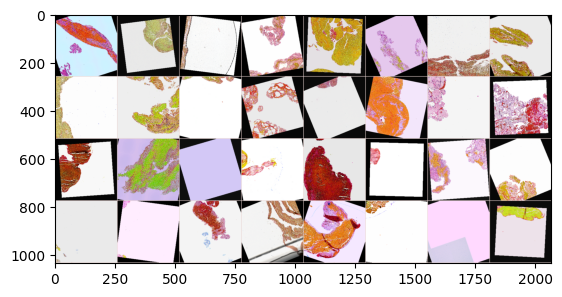

['CE', 'CE', 'LAA', 'CE', 'LAA', 'LAA', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'LAA', 'CE', 'LAA', 'LAA']


In [ ]:
import matplotlib.pyplot as plt
from skimage import io, img_as_float32
import numpy as np
import torch

# To get one image:
# temp_img, temp_lab = train_dataset[0]
# print(temp_img.shape)
# imshow(temp_img, title=num_labels[temp_lab.item()])
# plt.title(num_labels[temp_lab.item()])

# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["train"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

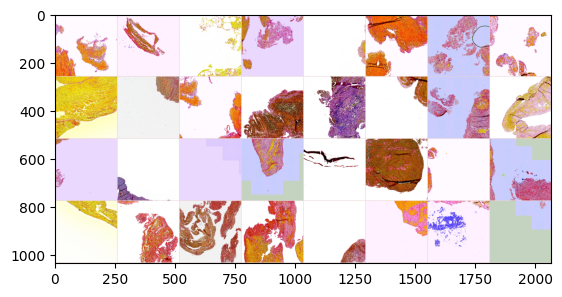

['CE', 'LAA', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'CE', 'LAA', 'CE', 'LAA', 'LAA', 'LAA']


In [ ]:
# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["val"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

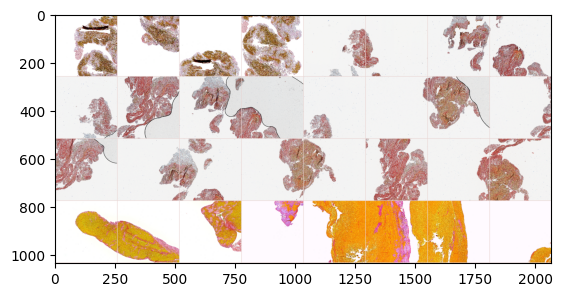

['CE', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA', 'CE', 'CE', 'CE', 'LAA', 'LAA', 'LAA', 'LAA', 'LAA']


In [ ]:
# To get a batch of images
temp_img, temp_lab = next(iter(dataloaders["test"]))
# Make a grid from batch
out = torchvision.utils.make_grid(temp_img)
imshow(out)
# imshow(out, title=[num_labels[x.item()] for x in temp_lab])
labels_list = [num_labels[x.item()] for x in temp_lab]
print(labels_list)
plt.show()

## Setting up training functions

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: ", device)

Using device:  cuda:0


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # # For book-keeping the losses and accuracies
    # epoch_ls = []
    # train_loss_ls = []
    # val_loss_ls = []
    # train_acc_ls = []
    # val_acc_ls = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def model_test(model):
  results = {}
  
  model.to(device)
  model.eval()

  correct=0
  total=0
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders['test']):
      inputs = inputs.to(device)
      labels = labels.to(device)
      # print(len(labels))

      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      # statistics
      # running_loss += loss.item() * inputs.size(0)
      total += labels.size(0)
      correct += torch.sum(preds == labels.data)
      # print(preds)
      preds_list = [num_labels[x.item()] for x in preds]
      # print(len(preds_list))

      for i in range(len(labels)):
        results[labels[i]] = preds_list[i]

  print(f'Accuracy of the network: {100 * correct // total} %')
  return results

## Try ResNet18

In [ ]:
model_ft = models.resnet18(weights="DEFAULT")
num_ftrs = model_ft.fc.in_features

model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 154MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6509 Acc: 0.6237
val Loss: 0.5702 Acc: 0.7325

Epoch 1/9
----------
train Loss: 0.6191 Acc: 0.6511
val Loss: 0.6417 Acc: 0.6947

Epoch 2/9
----------
train Loss: 0.5906 Acc: 0.6734
val Loss: 0.5887 Acc: 0.7309

Epoch 3/9
----------
train Loss: 0.5761 Acc: 0.6912
val Loss: 0.6536 Acc: 0.6366

Epoch 4/9
----------
train Loss: 0.5674 Acc: 0.6917
val Loss: 0.7183 Acc: 0.6068

Epoch 5/9
----------
train Loss: 0.5519 Acc: 0.7086
val Loss: 0.6449 Acc: 0.6623

Epoch 6/9
----------
train Loss: 0.5468 Acc: 0.7091
val Loss: 0.5882 Acc: 0.6955

Epoch 7/9
----------
train Loss: 0.5314 Acc: 0.7214
val Loss: 0.6111 Acc: 0.7268

Epoch 8/9
----------
train Loss: 0.5154 Acc: 0.7323
val Loss: 0.7133 Acc: 0.6536

Epoch 9/9
----------
train Loss: 0.5040 Acc: 0.7412
val Loss: 0.7065 Acc: 0.6638

Training complete in 33m 20s
Best val Acc: 0.732453


In [ ]:
results = model_test(model)

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-on-multiple-gpus

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))